## 국내유가와 국제유가의 상관관계 분석

In [88]:
import pandas as pd
import numpy as np
import re

In [89]:
#국내유가 데이터 불러오기 
domestic_data = pd.read_csv('./data/부산시유가데이터_fillna.csv', encoding='utf-8', sep=',')
domestic_data.head()

,번호,지역,상호,주소,기간,상표,셀프여부,휘발유,경유
0,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220214,S-OIL,셀프,1638.0,1508.0
1,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220215,S-OIL,셀프,1638.0,1518.0
2,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220216,S-OIL,셀프,1668.0,1518.0
3,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220217,S-OIL,셀프,1678.0,1528.0
4,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220218,S-OIL,셀프,1678.0,1538.0


In [90]:
#국제유가 데이터 불러오기 
international_data = pd.read_csv('./data/기간별 환율(20220214-20220816).csv', encoding='utf-8', sep=',')
international_data.head()

,일자,매매기준율
0,20220816,"1,308.40상승2.40"
1,20220815,"1,306.00상승4.50"
2,20220814,"1,306.00상승4.50"
3,20220813,"1,306.00상승4.50"
4,20220812,"1,306.00상승4.50"


#### 매매기준율에서 환율만 추출하기

In [91]:
international_data["매매기준율"] = international_data["매매기준율"].apply(lambda x : re.split("[ㄱ-ㅣ가-힣]", x)).str.get(0).str.replace(",","").astype(float)
international_data.head(10)

,일자,매매기준율
0,20220816,1308.4
1,20220815,1306.0
2,20220814,1306.0
3,20220813,1306.0
4,20220812,1306.0
5,20220811,1301.5
6,20220810,1305.0
7,20220809,1306.0
8,20220808,1304.5
9,20220807,1299.5


In [92]:
international_data

,일자,매매기준율
0,20220816,1308.4
1,20220815,1306.0
2,20220814,1306.0
3,20220813,1306.0
4,20220812,1306.0
...,...,...
179,20220218,1195.0
180,20220217,1197.5
181,20220216,1196.5
182,20220215,1198.0


In [93]:
#날짜 오름차순으로 정리
international_data.sort_values(by=["일자","매매기준율"], inplace=True)
international_data

,일자,매매기준율
183,20220214,1197.0
182,20220215,1198.0
181,20220216,1196.5
180,20220217,1197.5
179,20220218,1195.0
...,...,...
4,20220812,1306.0
3,20220813,1306.0
2,20220814,1306.0
1,20220815,1306.0


In [94]:
#인덱스 정리
international_data = international_data.reset_index().drop(columns="index")
international_data

,일자,매매기준율
0,20220214,1197.0
1,20220215,1198.0
2,20220216,1196.5
3,20220217,1197.5
4,20220218,1195.0
...,...,...
179,20220812,1306.0
180,20220813,1306.0
181,20220814,1306.0
182,20220815,1306.0


In [95]:
# 두바이유가 데이터 불러오기
du = pd.read_csv("./data/국제유가(두바이).csv", encoding="cp949")
du.head(10)

,날짜,두바이_종가
0,20220809,95.97
1,20220808,96.04
2,20220807,94.41
3,20220806,94.41
4,20220805,94.41
5,20220804,94.08
6,20220803,95.97
7,20220802,99.40
8,20220801,97.87
9,20220731,101.52


In [96]:
#날짜 오름차순으로 정리
du.sort_values(by=["날짜","두바이_종가"], inplace=True)
du

,날짜,두바이_종가
176,20220214,92.61
175,20220215,90.86
174,20220216,91.56
173,20220217,90.67
172,20220218,90.90
...,...,...
4,20220805,94.41
3,20220806,94.41
2,20220807,94.41
1,20220808,96.04


In [97]:
#인덱스 정리
du = du.reset_index().drop(columns="index")
du.tail(10)

,날짜,두바이_종가
167,20220731,101.52
168,20220801,97.87
169,20220802,99.40
170,20220803,95.97
171,20220804,94.08
172,20220805,94.41
173,20220806,94.41
174,20220807,94.41
175,20220808,96.04
176,20220809,95.97


#### 두바이 유가, 국내 유가 합치기

In [98]:
# int64->object->datetime 타입변경
international_data["일자"] = pd.to_datetime(international_data["일자"].astype(str))
international_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      184 non-null    datetime64[ns]
 1   매매기준율   184 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.0 KB


In [99]:
# object->datetime 타입변경
du["날짜"] = pd.to_datetime(du["날짜"].astype(str))
du.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      177 non-null    datetime64[ns]
 1   두바이_종가  177 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.9 KB


In [100]:
# 두바이 유가, 국내 유가 합치기
int_du_price = pd.merge(international_data, du, left_on="일자", right_on="날짜")
int_du_price

,일자,매매기준율,날짜,두바이_종가
0,2022-02-14,1197.0,2022-02-14,92.61
1,2022-02-15,1198.0,2022-02-15,90.86
2,2022-02-16,1196.5,2022-02-16,91.56
3,2022-02-17,1197.5,2022-02-17,90.67
4,2022-02-18,1195.0,2022-02-18,90.90
...,...,...,...,...
172,2022-08-05,1299.5,2022-08-05,94.41
173,2022-08-06,1299.5,2022-08-06,94.41
174,2022-08-07,1299.5,2022-08-07,94.41
175,2022-08-08,1304.5,2022-08-08,96.04


In [101]:
#날짜 컬럼 삭제
int_du_price = int_du_price.drop(columns="날짜")
int_du_price

,일자,매매기준율,두바이_종가
0,2022-02-14,1197.0,92.61
1,2022-02-15,1198.0,90.86
2,2022-02-16,1196.5,91.56
3,2022-02-17,1197.5,90.67
4,2022-02-18,1195.0,90.90
...,...,...,...
172,2022-08-05,1299.5,94.41
173,2022-08-06,1299.5,94.41
174,2022-08-07,1299.5,94.41
175,2022-08-08,1304.5,96.04


In [102]:
"""# 2월14일부터 8월 9일 외의 데이터 삭제
int_du_price = int_du_price.iloc[:122]
int_du_price"""

'# 2월14일부터 8월 9일 외의 데이터 삭제\nint_du_price = int_du_price.iloc[:122]\nint_du_price'

1 bbl(배럴당) = 158.9ℓ(리터)

KRW /ℓ= (두바이유(w)*환율)/158.9ℓ

In [103]:
int_du_price['환전'] = int_du_price['두바이_종가'] * int_du_price['매매기준율'] / 158.9
int_du_price

,일자,매매기준율,두바이_종가,환전
0,2022-02-14,1197.0,92.61,697.634802
1,2022-02-15,1198.0,90.86,685.023789
2,2022-02-16,1196.5,91.56,689.437004
3,2022-02-17,1197.5,90.67,683.306010
4,2022-02-18,1195.0,90.90,683.609188
...,...,...,...,...
172,2022-08-05,1299.5,94.41,772.094368
173,2022-08-06,1299.5,94.41,772.094368
174,2022-08-07,1299.5,94.41,772.094368
175,2022-08-08,1304.5,96.04,788.446696


In [104]:
int_du_price['환전'] = int_du_price['환전'].round(1)
int_du_price

,일자,매매기준율,두바이_종가,환전
0,2022-02-14,1197.0,92.61,697.6
1,2022-02-15,1198.0,90.86,685.0
2,2022-02-16,1196.5,91.56,689.4
3,2022-02-17,1197.5,90.67,683.3
4,2022-02-18,1195.0,90.90,683.6
...,...,...,...,...
172,2022-08-05,1299.5,94.41,772.1
173,2022-08-06,1299.5,94.41,772.1
174,2022-08-07,1299.5,94.41,772.1
175,2022-08-08,1304.5,96.04,788.4


In [105]:
domestic_data.columns

Index(['번호', '지역', '상호', '주소', '기간', '상표', '셀프여부', '휘발유', '경유'], dtype='object')

In [106]:
# object->datetime 타입변경
domestic_data["기간"] = pd.to_datetime(domestic_data["기간"].astype(str))
domestic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67234 entries, 0 to 67233
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   번호      67234 non-null  object        
 1   지역      67234 non-null  object        
 2   상호      67234 non-null  object        
 3   주소      67234 non-null  object        
 4   기간      67234 non-null  datetime64[ns]
 5   상표      67234 non-null  object        
 6   셀프여부    67234 non-null  object        
 7   휘발유     67234 non-null  float64       
 8   경유      67234 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 4.6+ MB


In [107]:
domestic_price = domestic_data.groupby(['기간'])[['휘발유','경유']].mean().round(1)
domestic_price

,휘발유,경유
기간,,
2022-02-14,1681.6,1513.2
2022-02-15,1686.4,1517.1
2022-02-16,1692.5,1522.9
2022-02-17,1697.0,1529.0
2022-02-18,1699.5,1532.2
...,...,...
2022-08-05,1831.1,1923.1
2022-08-06,1825.3,1917.6
2022-08-07,1823.2,1915.7


In [108]:
# 두바이 유가, 휘발유가, 경유가 합치기
oil_price = pd.merge(int_du_price, domestic_price, left_on="일자", right_on="기간")
oil_price.tail(20)

,일자,매매기준율,두바이_종가,환전,휘발유,경유
157,2022-07-21,1312.0,102.55,846.7,1959.4,2028.8
158,2022-07-22,1313.0,102.32,845.5,1947.1,2018.0
159,2022-07-23,1313.0,102.32,845.5,1934.2,2007.0
160,2022-07-24,1313.0,102.32,845.5,1931.0,2004.4
161,2022-07-25,1310.5,98.13,809.3,1925.0,1999.0
162,2022-07-26,1308.0,97.48,802.4,1909.8,1983.1
163,2022-07-27,1314.0,99.27,820.9,1898.0,1972.9
164,2022-07-28,1301.5,99.70,816.6,1889.6,1966.5
165,2022-07-29,1303.5,101.52,832.8,1881.5,1962.0
166,2022-07-30,1303.5,101.52,832.8,1876.9,1958.2


In [109]:
#컬럼명 변경
oil_price.rename(columns={"환전" : "원유"}, inplace=True)
oil_price

,일자,매매기준율,두바이_종가,원유,휘발유,경유
0,2022-02-14,1197.0,92.61,697.6,1681.6,1513.2
1,2022-02-15,1198.0,90.86,685.0,1686.4,1517.1
2,2022-02-16,1196.5,91.56,689.4,1692.5,1522.9
3,2022-02-17,1197.5,90.67,683.3,1697.0,1529.0
4,2022-02-18,1195.0,90.90,683.6,1699.5,1532.2
...,...,...,...,...,...,...
172,2022-08-05,1299.5,94.41,772.1,1831.1,1923.1
173,2022-08-06,1299.5,94.41,772.1,1825.3,1917.6
174,2022-08-07,1299.5,94.41,772.1,1823.2,1915.7
175,2022-08-08,1304.5,96.04,788.4,1813.1,1905.8


In [110]:
oil_price = oil_price.drop(columns=['매매기준율','두바이_종가'])
oil_price

,일자,원유,휘발유,경유
0,2022-02-14,697.6,1681.6,1513.2
1,2022-02-15,685.0,1686.4,1517.1
2,2022-02-16,689.4,1692.5,1522.9
3,2022-02-17,683.3,1697.0,1529.0
4,2022-02-18,683.6,1699.5,1532.2
...,...,...,...,...
172,2022-08-05,772.1,1831.1,1923.1
173,2022-08-06,772.1,1825.3,1917.6
174,2022-08-07,772.1,1823.2,1915.7
175,2022-08-08,788.4,1813.1,1905.8


In [111]:
oil_price.head(20)

,일자,원유,휘발유,경유
0,2022-02-14,697.6,1681.6,1513.2
1,2022-02-15,685.0,1686.4,1517.1
2,2022-02-16,689.4,1692.5,1522.9
3,2022-02-17,683.3,1697.0,1529.0
4,2022-02-18,683.6,1699.5,1532.2
5,2022-02-19,683.6,1702.0,1535.1
6,2022-02-20,683.6,1703.5,1535.9
7,2022-02-21,681.9,1705.9,1538.6
8,2022-02-22,690.3,1709.3,1543.0
9,2022-02-23,690.8,1711.9,1545.9


In [112]:
oil_price_corr = oil_price.corr(method='pearson')
oil_price_corr

,원유,휘발유,경유
원유,1.000000,0.702527,0.677799
휘발유,0.702527,1.000000,0.909750
경유,0.677799,0.909750,1.000000


In [113]:
# 기본적인 패키지부터 추가
import numpy as np
import pandas as pd
import scipy as super

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams, style, font_manager, rc

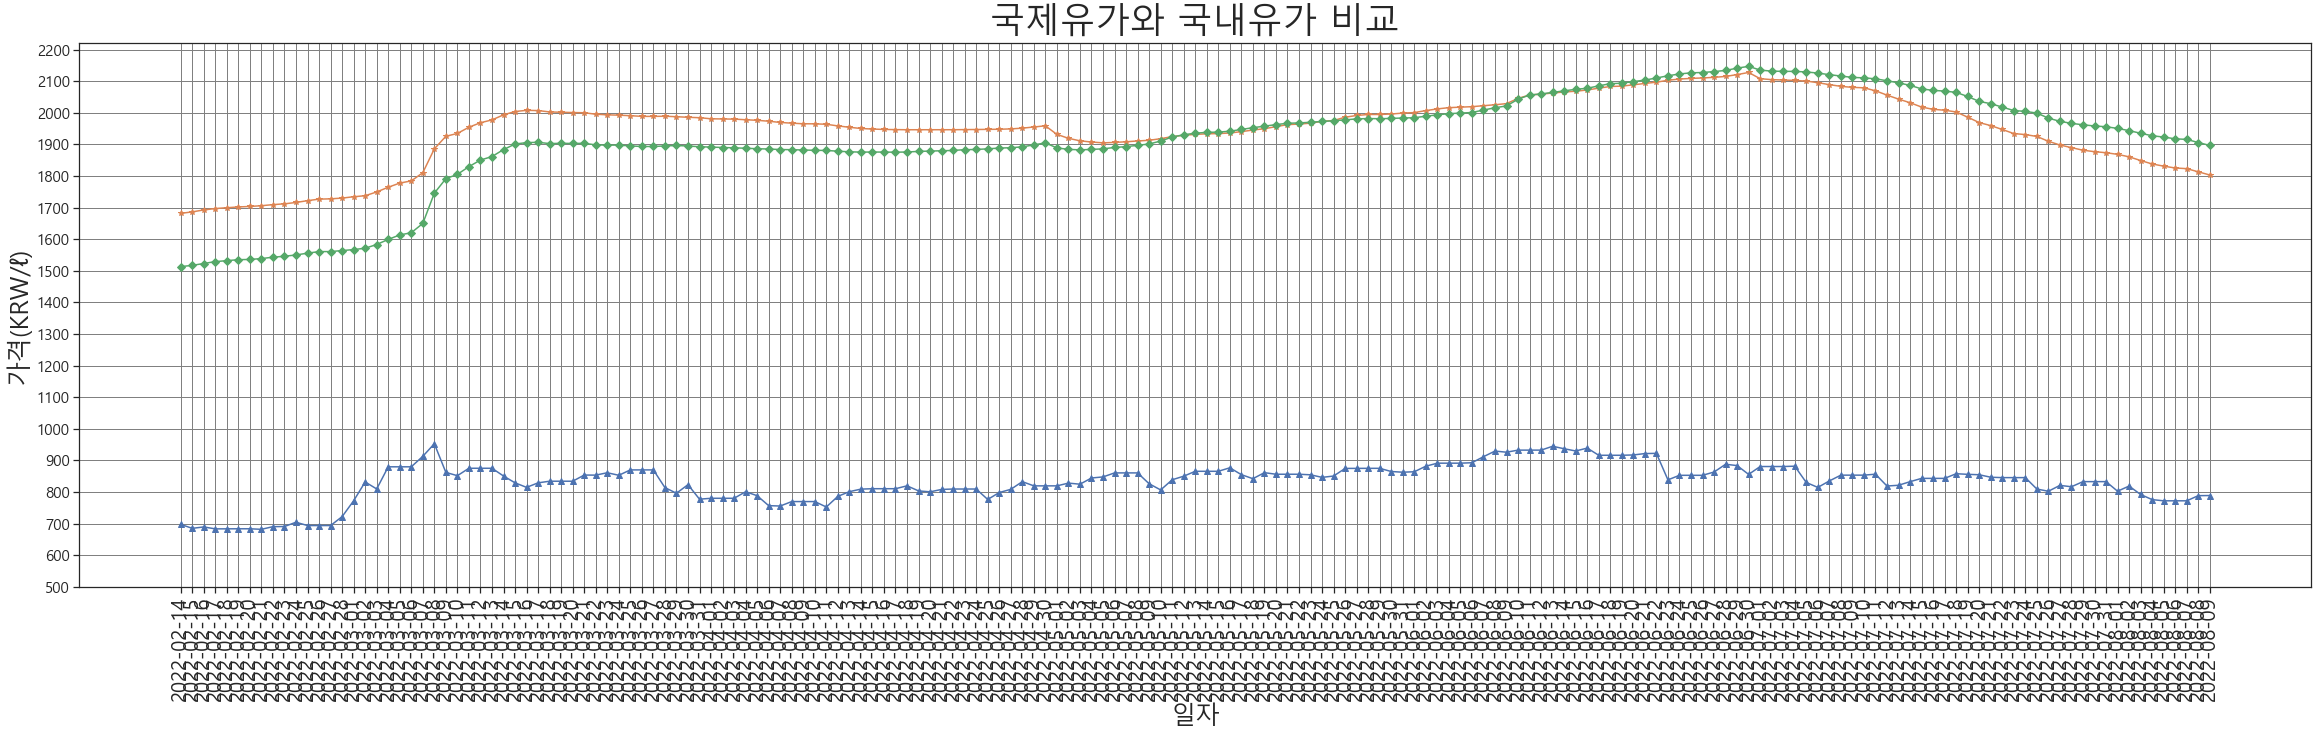

In [114]:
ax1 = oil_price.일자
ax2 = oil_price.원유
ax3 = oil_price.휘발유
ax4 = oil_price.경유

plt.figure(figsize=(40,10))
a = plt.plot(ax1, ax2, label="원유 가격", marker="^") # 원유 가격
b = plt.plot(ax1, ax3, label="휘발유 평균 가격", marker="*") # 휘발유 평균 가격
c = plt.plot(ax1, ax4, label="경유 평균 가격", marker="D") # 경유 평균 가격
p = [a,b,c]

plt.rcParams["font.family"] = "Malgun Gothic" #폰트 적용
plt.title("국제유가와 국내유가 비교", fontsize=35)
plt.xticks(ax1, fontsize=20, rotation=90) # x축
"""plt.text(11.8,700,'휘발유 평균 가격',fontsize=20) # 그래프 이름
plt.text(12,700,'경유 평균 가격',fontsize=20)
plt.text(12,700,'원유 가격',fontsize=20)"""
plt.yticks(np.arange(500, 2300, 100) ,fontsize=15) # y축
plt.xlabel("일자", fontsize=25) #x 축 이름
plt.ylabel("가격(KRW/ℓ)", fontsize=25) # y축 이름
#plt.legend(loc="best",ncol=2, fontsize= 20, shadow=True) # 범례
plt.grid(color="grey")


plt.show()

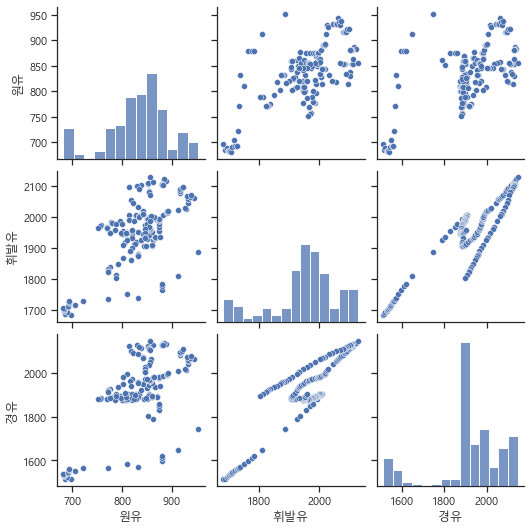

In [115]:
sns.set(style='ticks', color_codes=True)
plt.rcParams["font.family"] = "Malgun Gothic" #폰트 적용
sns.pairplot(oil_price)
plt.show()

##### 원유의 가격과 휘발유/원유 가격은 대체적으로 양의 관계가 보인다(상관계수로 설명)

- 원유-휘발유:0.683768, 원유-경유 : 0.656538 => 다소 높음

##### 휘발유와 경유 가격이 양의관계로 올라가다, 우크라이나 전쟁으로 인해 경유 가격이 휘발유 가격을 역전하면서 음의 관계로 바뀌었다.

- 휘발유-경유 : 0.906916 => 아주 높음

### 머신러닝 기본 설정

In [116]:
# 기본적인 패키지부터 추가
import numpy as np
import pandas as pd
import scipy as super

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams, style, font_manager, rc

In [117]:
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

In [118]:
# 머신러닝 패키지 추가
import statsmodels.api as sm
import sklearn as sk

In [119]:
y = oil_price["휘발유"]
y

0      1681.6
1      1686.4
2      1692.5
3      1697.0
4      1699.5
        ...  
172    1831.1
173    1825.3
174    1823.2
175    1813.1
176    1803.1
Name: 휘발유, Length: 177, dtype: float64

In [120]:
x = oil_price.drop(["일자", "휘발유"], axis="columns", inplace=False)
x

,원유,경유
0,697.6,1513.2
1,685.0,1517.1
2,689.4,1522.9
3,683.3,1529.0
4,683.6,1532.2
...,...,...
172,772.1,1923.1
173,772.1,1917.6
174,772.1,1915.7
175,788.4,1905.8


In [121]:
from sklearn.model_selection import train_test_split

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [134]:
# 데이터 훈련 세트, 테스트 세트 분리
train_input, test_input, train_target, test_target = train_test_split(x,y,random_state=42, test_size=0.3)

In [135]:
train_input.shape

(123, 2)

In [136]:
test_input.shape

(54, 2)

In [137]:
lr = LinearRegression()
lr.fit(X=train_input, y=train_target)

LinearRegression()

In [138]:
#훈련
lr.score(X=train_input, y=train_target)

0.838519026329359

In [139]:
#테스트
lr.score(X=test_input, y=test_target)

0.8465077608467038

In [143]:
test_pred = lr.predict(X=test_input)
test_pred

array([1801.43664114, 1919.69331737, 2079.79603453, 1938.22850219,
       1923.29676747, 1764.01028734, 2063.87467152, 1931.51146958,
       2009.16765464, 2080.0292892 , 1895.70466543, 1986.75649171,
       1948.80242772, 2057.46415996, 1743.27265425, 2012.12195942,
       2023.62767388, 1945.53786955, 1706.6745408 , 2033.06172758,
       1793.86287797, 1922.35699467, 1920.92074852, 1958.59884883,
       1947.10578367, 2041.13424419, 2055.69157709, 1919.46603205,
       1971.77242045, 1911.21603298, 1940.21749156, 2077.66901547,
       2063.28368376, 1943.17179634, 1715.55344441, 1932.26423765,
       2020.60717504, 2080.57110095, 1985.09357512, 2008.17387054,
       1945.84704151, 2003.83096918, 1938.40556118, 1924.58591865,
       2056.36972223, 1693.88657761, 1986.41028343, 2069.06124025,
       2034.66387876, 1909.42303946, 1930.69106477, 1905.67411652,
       1927.31564167, 2035.79188604])

In [145]:
test_target

19     1777.5
45     1984.4
139    2103.7
30     2007.7
67     1946.4
16     1737.5
119    2062.6
173    1825.3
109    2012.2
140    2102.3
24     1934.6
161    1925.0
41     1988.5
118    2058.8
15     1734.3
111    2017.9
113    2022.2
82     1908.2
9      1711.9
114    2025.4
18     1764.4
66     1946.0
60     1948.5
168    1868.4
170    1848.9
150    2031.8
117    2056.3
65     1946.0
90     1934.1
55     1965.0
29     2004.0
127    2092.8
144    2083.6
31     2007.0
12     1726.7
42     1989.0
156    1968.9
136    2127.5
98     1967.1
158    1947.1
38     1992.4
108    2006.9
85     1918.0
68     1946.7
142    2095.3
2      1692.5
100    1975.5
122    2072.1
153    2008.1
51     1973.3
76     1931.6
56     1963.6
26     1968.5
152    2010.9
Name: 휘발유, dtype: float64

In [146]:
mae = mean_absolute_error(y_true=test_target, y_pred=test_pred)
mae

32.2210414998293

In [127]:
gasolin_price = oil_price.to_numpy()[:,2]
gasolin_price

array([1681.6, 1686.4, 1692.5, 1697.0, 1699.5, 1702.0, 1703.5, 1705.9,
       1709.3, 1711.9, 1716.1, 1721.9, 1726.7, 1727.7, 1730.0, 1734.3,
       1737.5, 1749.4, 1764.4, 1777.5, 1784.4, 1810.3, 1885.8, 1925.6,
       1934.6, 1954.3, 1968.5, 1977.4, 1993.4, 2004.0, 2007.7, 2007.0,
       2002.6, 2001.6, 2000.7, 2000.1, 1995.4, 1993.5, 1992.4, 1990.8,
       1988.6, 1988.5, 1989.0, 1987.6, 1985.7, 1984.4, 1981.0, 1980.3,
       1979.9, 1978.0, 1976.1, 1973.3, 1969.4, 1967.1, 1965.2, 1965.0,
       1963.6, 1958.4, 1954.1, 1950.3, 1948.5, 1947.2, 1946.6, 1946.3,
       1946.3, 1946.0, 1946.0, 1946.4, 1946.7, 1947.0, 1947.4, 1947.8,
       1949.0, 1951.3, 1955.1, 1958.7, 1931.6, 1919.2, 1911.2, 1907.4,
       1904.8, 1906.2, 1908.2, 1910.8, 1912.9, 1918.0, 1924.6, 1928.7,
       1931.6, 1933.4, 1934.1, 1936.0, 1940.3, 1945.3, 1949.6, 1956.2,
       1962.5, 1964.2, 1967.1, 1972.9, 1975.5, 1985.9, 1991.4, 1994.6,
       1994.6, 1996.1, 1999.0, 2000.6, 2006.9, 2012.2, 2016.2, 2017.9,
      

In [128]:
gasolin_price = gasolin_price.reshape(-1,1)
gasolin_price

array([[1681.6],
       [1686.4],
       [1692.5],
       [1697.0],
       [1699.5],
       [1702.0],
       [1703.5],
       [1705.9],
       [1709.3],
       [1711.9],
       [1716.1],
       [1721.9],
       [1726.7],
       [1727.7],
       [1730.0],
       [1734.3],
       [1737.5],
       [1749.4],
       [1764.4],
       [1777.5],
       [1784.4],
       [1810.3],
       [1885.8],
       [1925.6],
       [1934.6],
       [1954.3],
       [1968.5],
       [1977.4],
       [1993.4],
       [2004.0],
       [2007.7],
       [2007.0],
       [2002.6],
       [2001.6],
       [2000.7],
       [2000.1],
       [1995.4],
       [1993.5],
       [1992.4],
       [1990.8],
       [1988.6],
       [1988.5],
       [1989.0],
       [1987.6],
       [1985.7],
       [1984.4],
       [1981.0],
       [1980.3],
       [1979.9],
       [1978.0],
       [1976.1],
       [1973.3],
       [1969.4],
       [1967.1],
       [1965.2],
       [1965.0],
       [1963.6],
       [1958.4],
       [1954.1

In [129]:
boston_df["PRICE"] = boston_data.target
boston_df.tail()

NameError: name 'boston_data' is not defined

In [ ]:
gasolin_target = np.concatenate((np.ones(100), np.zeros(20)))
gasolin_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [ ]:
train_input, test_input, train_target, test_target = train_test_split( gasolin_price, gasolin_target, random_state=42, stratify= gasolin_target)

ValueError: Found input variables with inconsistent numbers of samples: [122, 120]

In [ ]:
train_input
test_input
train_target
test_target

